<a href="https://colab.research.google.com/github/CortneyMo/SpringBoard_Casestudies/blob/main/NBA_2022_2023_Springboard_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NBA 2022-2023 Season & Playoffs Analysis
## BY Cortney Moore

**Introduction:**

In the dynamic realm of professional basketball, every statistic tells a story, and every player's contribution holds a piece of the puzzle that defines a team's success. As part of my Springboard curriculum's final project, I embark on a captivating journey into the heart of the NBA, armed with a dataset meticulously curated from the courts of Kaggle.

This analysis serves as a testament to my prowess in navigating the intricate world of data analytics using Python. My goal is not just to crunch numbers, but to uncover the hidden narratives that drive the game, translating raw data into meaningful insights that illuminate the sport's nuances. Through this project, I showcase my ability to dissect complex datasets, identify trends that shape outcomes, and draw conclusions that deepen our appreciation of basketball's captivating dynamics.

With every calculated point, every hard-won rebound, and every skillfully executed assist, the top players etch their names into the annals of basketball history. In the pages that follow, I embark on an exploration of their performances, dissecting the interplay between individual brilliance and team triumph. As I delve into this analysis, I invite you to join me on a journey that transcends the box score, revealing the intricate dance between statistics and success in the world of NBA basketball.

**Import Libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

**Import Datasets**

In [2]:
df_basics = pd.read_csv('basic.csv')

### **Exploring Datasets**

In [3]:
#Player game basics initial view

print(df_basics.info())
print(df_basics.head(3))
print(df_basics.describe().round())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34024 entries, 0 to 34023
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gameid        34024 non-null  int64  
 1   home          34024 non-null  bool   
 2   team          34024 non-null  object 
 3   playerid      34024 non-null  int64  
 4   name          34024 non-null  object 
 5   SEC           27739 non-null  float64
 6   FGM           34024 non-null  int64  
 7   FGA           34024 non-null  int64  
 8   FGpct         34024 non-null  float64
 9   3PM           34024 non-null  int64  
 10  3PA           34024 non-null  int64  
 11  3Ppct         34024 non-null  float64
 12  FTM           34024 non-null  int64  
 13  FTA           34024 non-null  int64  
 14  FTpct         34024 non-null  float64
 15  ORB           34024 non-null  int64  
 16  DRB           34024 non-null  int64  
 17  TRB           34024 non-null  int64  
 18  AST           34024 non-nu

### **Data Preperation**

**Data Cleaning**

850600


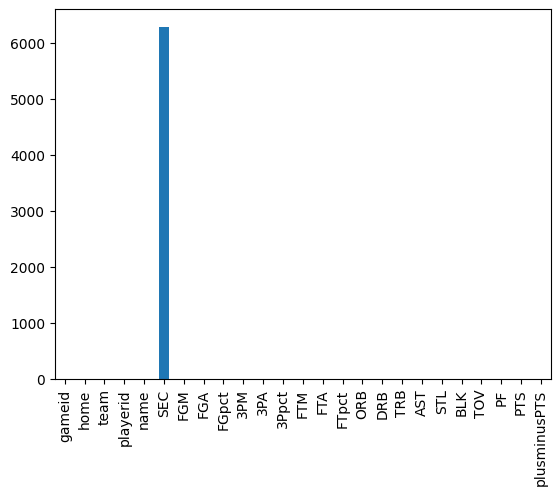

In [4]:
print(df_basics.isna().count().sum())
df_basics.isna().sum().plot(kind='bar')
plt.show()

In [5]:
#Filling in NUll values with 0.

df_basics.fillna(0)

,gameid,home,team,playerid,name,SEC,FGM,FGA,FGpct,3PM,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,plusminusPTS
0,22200001,True,BOS,1627759,Jaylen Brown,2314.0,14,24,0.583,4,...,0,3,3,2,2,1,4,1,35,7
1,22200001,True,BOS,1628369,Jayson Tatum,2317.0,13,20,0.650,2,...,0,12,12,4,1,1,3,1,35,10
2,22200001,True,BOS,201143,Al Horford,1386.0,2,7,0.286,2,...,1,4,5,1,0,0,0,4,6,8
3,22200001,True,BOS,1628401,Derrick White,1442.0,1,3,0.333,0,...,1,2,3,4,1,0,1,2,2,9
4,22200001,True,BOS,203935,Marcus Smart,2165.0,3,8,0.375,1,...,1,2,3,7,1,0,1,3,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34019,52200211,False,OKC,1630322,Lindy Waters III,979.0,2,7,0.286,1,...,2,0,2,2,1,0,2,2,5,-8
34020,52200211,False,OKC,1630598,Aaron Wiggins,903.0,2,3,0.667,0,...,1,1,2,0,0,0,0,1,4,-6
34021,52200211,False,OKC,1631172,Ousmane Dieng,430.0,2,5,0.400,0,...,0,2,2,0,0,0,0,1,4,1
34022,52200211,False,OKC,1630544,Tre Mann,311.0,0,0,0.000,0,...,0,1,1,1,0,0,3,0,0,0


In [6]:
#Updating column types

df_basics['gameid'] = df_basics['gameid'].astype(str)
df_basics['playerid'] = df_basics['playerid'].astype(str)

## **Visualizing Data**
### Identifying Top Players

First lets take a closer look at player totals throughouts the 2022-2023 basketball season and rank them per category.

In [7]:
#creating player stats dataframe
player_stats = df_basics.groupby(['playerid','name']).sum(numeric_only = True)

  playerid                      name team  plusminusPTS
0   203999              Nikola Jokic  DEN           809
1   203932              Aaron Gordon  DEN           705
2   203484  Kentavious Caldwell-Pope  DEN           575
3  1629008        Michael Porter Jr.  DEN           568
4  1628369              Jayson Tatum  BOS           549
5  1628401             Derrick White  BOS           491
6   201950              Jrue Holiday  MIL           485
7  1627750              Jamal Murray  DEN           481
8  1629636            Darius Garland  CLE           420
9   203954               Joel Embiid  PHI           418


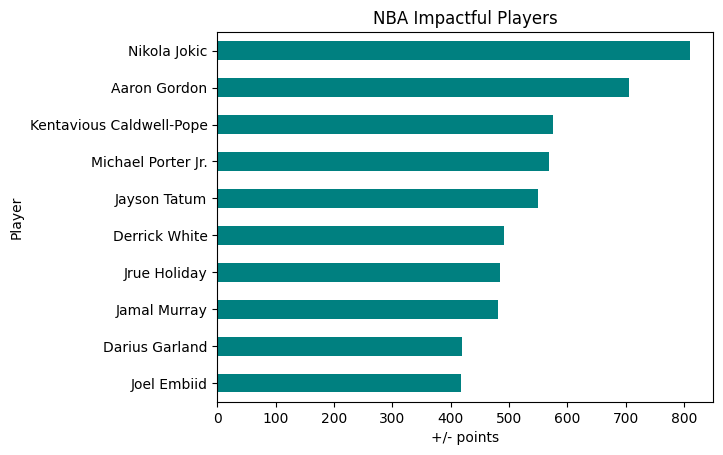

In [8]:
# Ranking by Field Goals Made

plus_minus = df_basics[['playerid','name','team','plusminusPTS']]
players_by_impact = plus_minus.groupby(['playerid', 'name','team']).sum(numeric_only = True)
players_by_impact.sort_values(['plusminusPTS'], ascending=False, inplace=True)
top_10_impacters = players_by_impact.nlargest(10,'plusminusPTS')
top_10_impacters.reset_index(inplace=True)
print(top_10_impacters)

top_10_impacters.plot(x='name', y='plusminusPTS', kind='barh', legend=False, color='teal')
plt.xlabel('+/- points')
plt.ylabel('Player')
plt.title("NBA Impactful Players")
plt.gca().invert_yaxis()
plt.show()

In [9]:
#Top 10 players stats stats

# Identify the common columns
common_columns = set(top_10_impacters.columns) & set(player_stats.columns)

# Exclude common columns from the second dataframe
player_stats_excluded = player_stats.drop(columns=common_columns)

nba_top_impactful_players_stats = pd.merge(top_10_impacters, player_stats_excluded, on='name')
print(nba_top_impactful_players_stats)
print(nba_top_impactful_players_stats.describe().round())

  playerid                      name team  plusminusPTS  home       SEC  FGM  \
0   203999              Nikola Jokic  DEN           809    46  186711.0  873   
1   203932              Aaron Gordon  DEN           705    48  166074.0  530   
2   203484  Kentavious Caldwell-Pope  DEN           575    50  183112.0  366   
3  1629008        Michael Porter Jr.  DEN           568    43  147034.0  497   
4  1628369              Jayson Tatum  BOS           549    47  211874.0  912   
5  1628401             Derrick White  BOS           491    52  174750.0  443   
6   201950              Jrue Holiday  MIL           485    38  142396.0  524   
7  1627750              Jamal Murray  DEN           481    47  175917.0  667   
8  1629636            Darius Garland  CLE           420    37  158140.0  557   
9   203954               Joel Embiid  PHI           418    42  157231.0  794   

    FGA   FGpct  3PM  ...   FTpct  ORB  DRB   TRB  AST  STL  BLK  TOV   PF  \
0  1436  55.789   92  ...  68.450  236  8

  playerid                   name team  FGM   FGA   FGpct
0  1628369           Jayson Tatum  BOS  912  1963  43.255
1   203999           Nikola Jokic  DEN  873  1436  55.789
2  1627759           Jaylen Brown  BOS  860  1748  42.923
3   203954            Joel Embiid  PHI  794  1481  40.127
4  1628389            Bam Adebayo  MIA  775  1482  52.706
5  1630162        Anthony Edwards  MIN  773  1691  38.948
6     2544           LeBron James  LAL  768  1535  36.103
7  1628368           De'Aaron Fox  SAC  752  1496  40.365
8   203507  Giannis Antetokounmpo  MIL  735  1331  36.279
9  1628378       Donovan Mitchell  CLE  724  1506  34.611


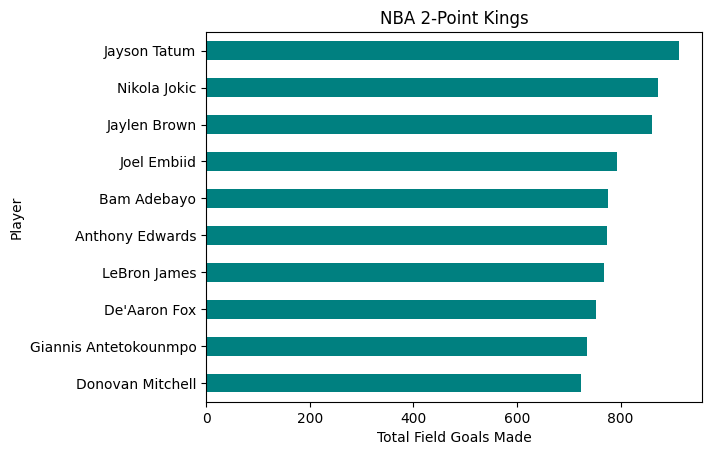

In [10]:
# Ranking by Field Goals Made

field_goals = df_basics[['playerid','name','team','FGM','FGA','FGpct']]
players_by_fgm = field_goals.groupby(['playerid', 'name','team']).sum(numeric_only = True)
players_by_fgm.sort_values(['FGM'], ascending=False, inplace=True)
top_10_made2pointers = players_by_fgm.nlargest(10,'FGM')
top_10_made2pointers.reset_index(inplace=True)
print(top_10_made2pointers)

top_10_made2pointers.plot(x='name', y='FGM', kind='barh', legend=False, color='teal')
plt.xlabel('Total Field Goals Made')
plt.ylabel('Player')
plt.title("NBA 2-Point Kings")
plt.gca().invert_yaxis()
plt.show()

In [11]:
#Top 10 players stats stats

# Identify the common columns
common_columns = set(top_10_made2pointers.columns) & set(player_stats.columns)

# Exclude common columns from the second dataframe
player_stats_excluded = player_stats.drop(columns=common_columns)

nba_top_fgshooters_stats = pd.merge(top_10_made2pointers, player_stats_excluded, on='name')
print(nba_top_fgshooters_stats)
print(nba_top_fgshooters_stats.describe().round())

  playerid                   name team  FGM   FGA   FGpct  home       SEC  \
0  1628369           Jayson Tatum  BOS  912  1963  43.255    47  211874.0   
1   203999           Nikola Jokic  DEN  873  1436  55.789    46  186711.0   
2  1627759           Jaylen Brown  BOS  860  1748  42.923    46  189367.0   
3   203954            Joel Embiid  PHI  794  1481  40.127    42  157231.0   
4  1628389            Bam Adebayo  MIA  775  1482  52.706    51  211559.0   
5  1630162        Anthony Edwards  MIN  773  1691  38.948    44  187310.0   
6     2544           LeBron James  LAL  768  1535  36.103    37  157109.0   
7  1628368           De'Aaron Fox  SAC  752  1496  40.365    42  162293.0   
8   203507  Giannis Antetokounmpo  MIL  735  1331  36.279    34  126908.0   
9  1628378       Donovan Mitchell  CLE  724  1506  34.611    38  158338.0   

   3PM  3PA  ...  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  plusminusPTS  
0  293  850  ...  104  755   859  447   99   72  269  204  2768         

  playerid                name team  3PM  3PA   3Ppct
0   202691       Klay Thompson  GSW  351  867  31.862
1   201939       Stephen Curry  GSW  330  796  28.790
2  1628369        Jayson Tatum  BOS  293  850  31.187
3  1627741         Buddy Hield  IND  288  677  34.476
4  1628378    Donovan Mitchell  CLE  258  680  26.620
5  1629622           Max Strus  MIA  248  715  34.187
6   203081      Damian Lillard  POR  244  658  20.537
7   203944       Julius Randle  NYK  235  702  25.817
8  1629008  Michael Porter Jr.  DEN  234  585  31.042
9  1630162     Anthony Edwards  MIN  231  638  30.876


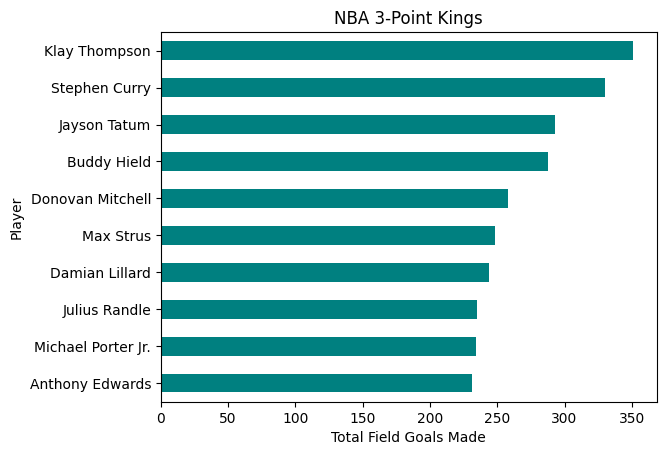

In [12]:
# Ranking by 3 pointers Made

threes = df_basics[['playerid','name','team','3PM','3PA','3Ppct']]
players_by_3s = threes.groupby(['playerid', 'name','team']).sum(numeric_only = True)
players_by_3s.sort_values(['3PM'], ascending=False, inplace=True)
top_10_3pointers = players_by_3s.nlargest(10,'3PM')
top_10_3pointers.reset_index(inplace=True)
print(top_10_3pointers)

top_10_3pointers.plot(x='name', y='3PM', kind='barh', legend=False, color='teal')
plt.xlabel('Total Field Goals Made')
plt.ylabel('Player')
plt.title("NBA 3-Point Kings")
plt.gca().invert_yaxis()
plt.show()

In [13]:
#Top 10 players stats stats

# Identify the common columns
common_columns = set(top_10_3pointers.columns) & set(player_stats.columns)

# Exclude common columns from the second dataframe
player_stats_excluded = player_stats.drop(columns=common_columns)

nba_top_3shooters_stats = pd.merge(top_10_3pointers, player_stats_excluded, on='name')
print(nba_top_3shooters_stats)
print(nba_top_3shooters_stats.describe().round())

  playerid                name team  3PM  3PA   3Ppct  home       SEC  FGM  \
0   202691       Klay Thompson  GSW  351  867  31.862    43  164805.0  631   
1   201939       Stephen Curry  GSW  330  796  28.790    32  146058.0  704   
2  1628369        Jayson Tatum  BOS  293  850  31.187    47  211874.0  912   
3  1627741         Buddy Hield  IND  288  677  34.476    39  148915.0  475   
4  1628378    Donovan Mitchell  CLE  258  680  26.620    38  158338.0  724   
5  1629622           Max Strus  MIA  248  715  34.187    51  178736.0  409   
6   203081      Damian Lillard  POR  244  658  20.537    35  126396.0  556   
7   203944       Julius Randle  NYK  235  702  25.817    44  184013.0  713   
8  1629008  Michael Porter Jr.  DEN  234  585  31.042    43  147034.0  497   
9  1630162     Anthony Edwards  MIN  231  638  30.876    44  187310.0  773   

    FGA  ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  plusminusPTS  
0  1471  ...   40  300  340  192   56   33  149  158  1750        

  playerid                     name team  FTM  FTA   FTpct
0   203954              Joel Embiid  PHI  737  855  64.467
1  1628983  Shai Gilgeous-Alexander  OKC  689  759  63.384
2  1628369             Jayson Tatum  BOS  651  759  78.870
3   202710             Jimmy Butler  MIA  640  762  71.202
4  1629027               Trae Young  ATL  611  691  68.882
5  1629029              Luka Doncic  DAL  515  694  47.455
6   203507    Giannis Antetokounmpo  MIL  512  803  40.237
7   203081           Damian Lillard  POR  510  558  53.048
8   201942            DeMar DeRozan  CHI  467  537  66.404
9   203999             Nikola Jokic  DEN  452  554  68.450


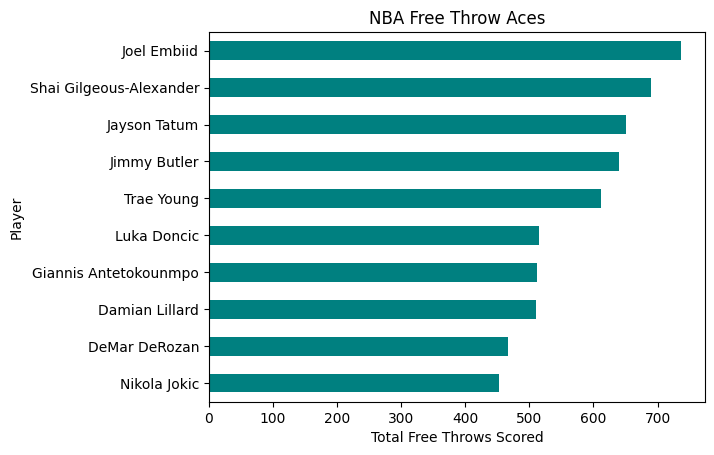

In [14]:
# Ranking by free throw pointers Made

free_throws = df_basics[['playerid','name','team','FTM','FTA','FTpct']]
players_by_free_throws = free_throws.groupby(['playerid', 'name','team']).sum(numeric_only = True)
players_by_free_throws.sort_values(['FTM'], ascending=False, inplace=True)
top_10_free_throws = players_by_free_throws.nlargest(10,'FTM')
top_10_free_throws.reset_index(inplace=True)
print(top_10_free_throws)

top_10_free_throws.plot(x='name', y='FTM', kind='barh', legend=False, color='teal')
plt.xlabel('Total Free Throws Scored')
plt.ylabel('Player')
plt.title("NBA Free Throw Aces")
plt.gca().invert_yaxis()
plt.show()

In [15]:
#Top 10 players stats stats

# Identify the common columns
common_columns = set(top_10_free_throws.columns) & set(player_stats.columns)

# Exclude common columns from the second dataframe
player_stats_excluded = player_stats.drop(columns=common_columns)

nba_top_lineshooters_stats = pd.merge(top_10_free_throws, player_stats_excluded, on='name')
print(nba_top_lineshooters_stats)
print(nba_top_lineshooters_stats.describe().round())

  playerid                     name team  FTM  FTA   FTpct  home       SEC  \
0   203954              Joel Embiid  PHI  737  855  64.467    42  157231.0   
1  1628983  Shai Gilgeous-Alexander  OKC  689  759  63.384    32  149602.0   
2  1628369             Jayson Tatum  BOS  651  759  78.870    47  211874.0   
3   202710             Jimmy Butler  MIA  640  762  71.202    45  185605.0   
4  1629027               Trae Young  ATL  611  691  68.882    42  168442.0   
5  1629029              Luka Doncic  DAL  515  694  47.455    38  143430.0   
6   203507    Giannis Antetokounmpo  MIL  512  803  40.237    34  126908.0   
7   203081           Damian Lillard  POR  510  558  53.048    35  126396.0   
8   201942            DeMar DeRozan  CHI  467  537  66.404    38  165649.0   
9   203999             Nikola Jokic  DEN  452  554  68.450    46  186711.0   

   FGM   FGA  ...  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  plusminusPTS  
0  794  1481  ...  129  629   758  298   72  137  261  232  

  playerid                     name team   PTS
0  1628369             Jayson Tatum  BOS  2768
1   203954              Joel Embiid  PHI  2396
2   203999             Nikola Jokic  DEN  2290
3  1627759             Jaylen Brown  BOS  2237
4  1628983  Shai Gilgeous-Alexander  OKC  2189
5  1629029              Luka Doncic  DAL  2138
6  1630162          Anthony Edwards  MIN  2132
7  1629027               Trae Young  ATL  2114
8   202710             Jimmy Butler  MIA  2110
9   203944            Julius Randle  NYK  2102


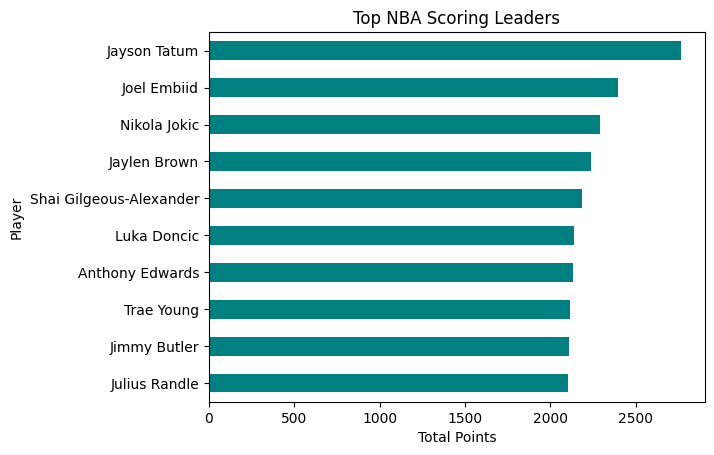

In [16]:
# Ranking by overall points scored

points = df_basics[['playerid','name','team','PTS']]
players_by_points = points.groupby(['playerid', 'name','team']).sum(numeric_only = True)
players_by_points.sort_values(['PTS'], ascending=False, inplace=True)
top_10_scorers = players_by_points.nlargest(10,'PTS')
top_10_scorers.reset_index(inplace=True)
print(top_10_scorers)

top_10_scorers.plot(x='name', y='PTS', kind='barh', legend=False, color='teal')
plt.xlabel('Total Points')
plt.ylabel('Player')
plt.title("Top NBA Scoring Leaders")
plt.gca().invert_yaxis()
plt.show()

In [17]:
#Top 10 players stats stats

# Identify the common columns
common_columns = set(top_10_scorers.columns) & set(player_stats.columns)

# Exclude common columns from the second dataframe
player_stats_excluded = player_stats.drop(columns=common_columns)

nba_top_scorers_stats = pd.merge(top_10_scorers, player_stats_excluded, on='name')
print(nba_top_scorers_stats)
print(nba_top_scorers_stats.describe().round())

  playerid                     name team   PTS  home       SEC  FGM   FGA  \
0  1628369             Jayson Tatum  BOS  2768    47  211874.0  912  1963   
1   203954              Joel Embiid  PHI  2396    42  157231.0  794  1481   
2   203999             Nikola Jokic  DEN  2290    46  186711.0  873  1436   
3  1627759             Jaylen Brown  BOS  2237    46  189367.0  860  1748   
4  1628983  Shai Gilgeous-Alexander  OKC  2189    32  149602.0  720  1422   
5  1629029              Luka Doncic  DAL  2138    38  143430.0  719  1449   
6  1630162          Anthony Edwards  MIN  2132    44  187310.0  773  1691   
7  1629027               Trae Young  ATL  2114    42  168442.0  665  1557   
8   202710             Jimmy Butler  MIA  2110    45  185605.0  703  1373   
9   203944            Julius Randle  NYK  2102    44  184013.0  713  1579   

    FGpct  3PM  ...   FTpct  ORB  DRB   TRB  AST  STL  BLK  TOV   PF  \
0  43.255  293  ...  78.870  104  755   859  447   99   72  269  204   
1  40.12

  playerid               name team  AST
0   203999       Nikola Jokic  DEN  868
1  1629027         Trae Young  ATL  809
2   201935       James Harden  PHI  709
3  1627734   Domantas Sabonis  SAC  606
4  1630169  Tyrese Haliburton  IND  585
5   203110     Draymond Green  GSW  582
6   101108         Chris Paul  PHX  576
7  1629636     Darius Garland  CLE  563
8  1627750       Jamal Murray  DEN  542
9   201950       Jrue Holiday  MIL  535


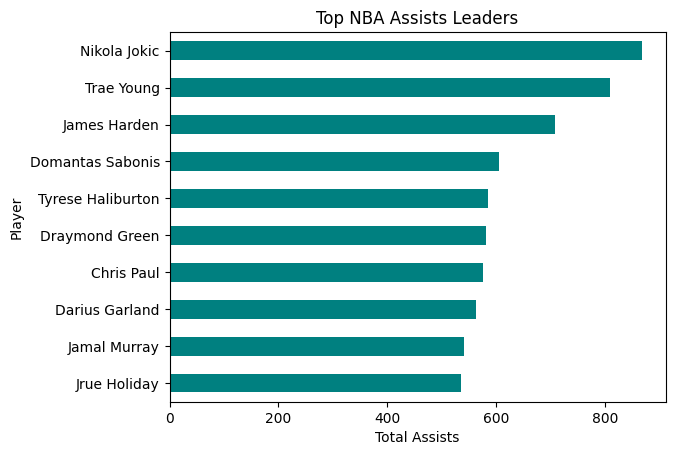

In [18]:
# Ranking by overall points scored

assists = df_basics[['playerid','name','team','AST']]
players_by_assists = assists.groupby(['playerid', 'name','team']).sum(numeric_only = True)
players_by_assists.sort_values(['AST'], ascending=False, inplace=True)
top_10_assists = players_by_assists.nlargest(10,'AST')
top_10_assists.reset_index(inplace=True)
print(top_10_assists)

top_10_assists.plot(x='name', y='AST', kind='barh', legend=False, color='teal')
plt.xlabel('Total Assists')
plt.ylabel('Player')
plt.title("Top NBA Assists Leaders")
plt.gca().invert_yaxis()
plt.show()

In [19]:
#Top 10 players stats stats

# Identify the common columns
common_columns = set(top_10_assists.columns) & set(player_stats.columns)

# Exclude common columns from the second dataframe
player_stats_excluded = player_stats.drop(columns=common_columns)

nba_top_assistants_stats = pd.merge(top_10_assists, player_stats_excluded, on='name')
print(nba_top_assistants_stats)
print(nba_top_assistants_stats.describe().round())

  playerid               name team  AST  home       SEC  FGM   FGA   FGpct  \
0   203999       Nikola Jokic  DEN  868    46  186711.0  873  1436  55.789   
1  1629027         Trae Young  ATL  809    42  168442.0  665  1557  34.079   
2   201935       James Harden  PHI  709    40  153733.0  443  1025  29.788   
3  1627734   Domantas Sabonis  SAC  606    43  178712.0  626  1037  52.683   
4  1630169  Tyrese Haliburton  IND  585    31  112971.0  412   841  27.151   
5   203110     Draymond Green  GSW  582    45  159879.0  292   565  44.973   
6   101108         Chris Paul  PHX  576    40  128332.0  332   759  28.730   
7  1629636     Darius Garland  CLE  563    37  158140.0  557  1209  34.675   
8  1627750       Jamal Murray  DEN  542    47  175917.0  667  1451  38.766   
9   201950       Jrue Holiday  MIL  535    38  142396.0  524  1108  33.653   

   3PM  ...   FTpct  ORB  DRB   TRB  STL  BLK  TOV   PF   PTS  plusminusPTS  
0   92  ...  68.450  236  850  1086  108   67  317  243  2290  

  playerid               name team  ORB  DRB   TRB
0   203999       Nikola Jokic  DEN  236  850  1086
1  1627734   Domantas Sabonis  SAC  282  768  1050
2   203076      Anthony Davis  LAL  242  700   942
3  1628389        Bam Adebayo  MIA  253  688   941
4  1626172       Kevon Looney  GSW  335  595   930
5   202696     Nikola Vucevic  CHI  160  765   925
6   203497        Rudy Gobert  MIN  253  632   885
7  1628369       Jayson Tatum  BOS  104  755   859
8   203944      Julius Randle  NYK  158  692   850
9   202685  Jonas Valanciunas  NOP  231  591   822


<Figure size 1000x600 with 0 Axes>

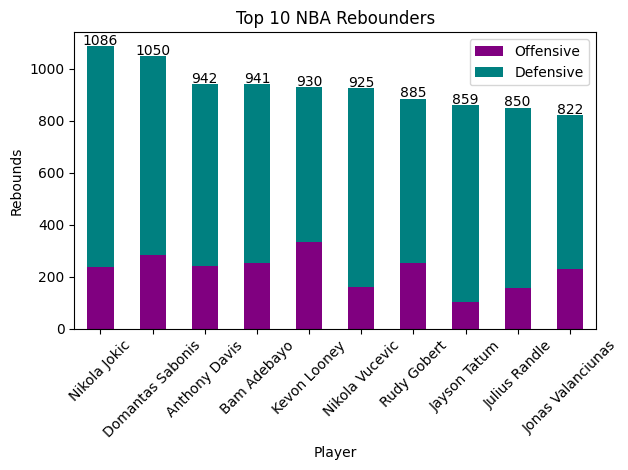

In [20]:
# Ranking by rebounders Made

rebounders = df_basics[['playerid','name','team','ORB','DRB','TRB']]
players_by_rebounders = rebounders.groupby(['playerid', 'name','team']).sum(numeric_only = True)
players_by_rebounders.sort_values(['TRB'], ascending=False, inplace=True)
top_10_rebounders = players_by_rebounders.nlargest(10,'TRB')
top_10_rebounders.reset_index(inplace=True)
print(top_10_rebounders)

plt.figure(figsize=(10,6))
ax = top_10_rebounders.plot(x='name', y=['ORB','DRB'], kind='bar', stacked=True, color=['purple','teal'])
ax.set_ylabel('Rebounds')
ax.set_xlabel('Player')
ax.set_title("Top 10 NBA Rebounders")

for index, row in top_10_rebounders.iterrows():
    total_rebounds = row['TRB']
    ax.text(index, total_rebounds + 5, str(total_rebounds), ha='center', fontsize=10)

plt.xticks(range(len(top_10_rebounders)), top_10_rebounders['name'], rotation=45)
plt.tight_layout()
plt.legend(['Offensive','Defensive','Total'])
plt.show()

In [21]:
#Top 10 players stats stats

# Identify the common columns
common_columns = set(top_10_rebounders.columns) & set(player_stats.columns)

# Exclude common columns from the second dataframe
player_stats_excluded = player_stats.drop(columns=common_columns)

nba_top_rebounders_stats = pd.merge(top_10_rebounders, player_stats_excluded, on='name')
print(nba_top_rebounders_stats)
print(nba_top_rebounders_stats.describe().round())

  playerid               name team  ORB  DRB   TRB  home       SEC  FGM   FGA  \
0   203999       Nikola Jokic  DEN  236  850  1086    46  186711.0  873  1436   
1  1627734   Domantas Sabonis  SAC  282  768  1050    43  178712.0  626  1037   
2   203076      Anthony Davis  LAL  242  700   942    40  153295.0  684  1235   
3  1628389        Bam Adebayo  MIA  253  688   941    51  211559.0  775  1482   
4  1626172       Kevon Looney  GSW  335  595   930    47  136979.0  279   448   
5   202696     Nikola Vucevic  CHI  160  765   925    41  169214.0  609  1171   
6   203497        Rudy Gobert  MIN  253  632   885    39  141470.0  395   603   
7  1628369       Jayson Tatum  BOS  104  755   859    47  211874.0  912  1963   
8   203944      Julius Randle  NYK  158  692   850    44  184013.0  713  1579   
9   202685  Jonas Valanciunas  NOP  231  591   822    41  119915.0  453   825   

   ...  FTM  FTA   FTpct  AST  STL  BLK  TOV   PF   PTS  plusminusPTS  
0  ...  452  554  68.450  868  108  

### Identifying Top Teams

  playerid                      name team  plusminusPTS
0   203999              Nikola Jokic  DEN           809
1   203932              Aaron Gordon  DEN           705
2   203484  Kentavious Caldwell-Pope  DEN           575
3  1629008        Michael Porter Jr.  DEN           568
4  1628369              Jayson Tatum  BOS           549
5  1628401             Derrick White  BOS           491
6   201950              Jrue Holiday  MIL           485
7  1627750              Jamal Murray  DEN           481
8  1629636            Darius Garland  CLE           420
9   203954               Joel Embiid  PHI           418


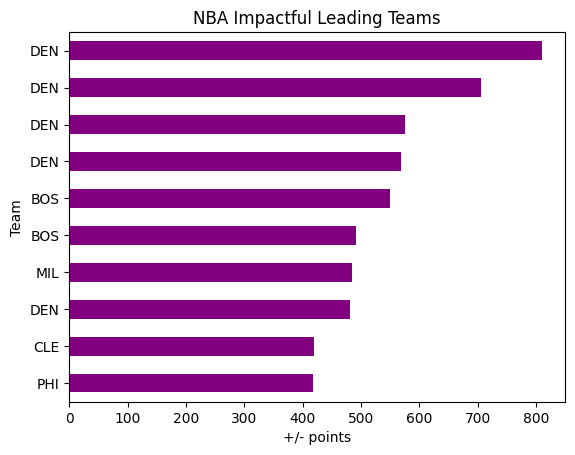

In [22]:
# Ranking by Field Goals Made

tm_plus_minus = df_basics[['team','plusminusPTS']]
teams_by_impact = tm_plus_minus.groupby(['team']).sum(numeric_only = True)
teams_by_impact.sort_values(['plusminusPTS'], ascending=False, inplace=True)
tm_top_10_impacters = players_by_impact.nlargest(10,'plusminusPTS')
tm_top_10_impacters.reset_index(inplace=True)
print(tm_top_10_impacters)

tm_top_10_impacters.plot(x='team', y='plusminusPTS', kind='barh', legend=False, color='purple')
plt.xlabel('+/- points')
plt.ylabel('Team')
plt.title("NBA Impactful Leading Teams")
plt.gca().invert_yaxis()
plt.show()

  team   FGM   FGA    FGpct
0  DEN  4419  8807  495.662
1  BOS  4277  8988  454.297
2  LAL  4211  8784  454.671
3  MIA  4200  9157  440.354
4  GSW  4083  8610  457.269
5  ATL  3967  8248  429.106
6  PHX  3927  8343  434.456
7  SAC  3860  7901  443.137
8  NYK  3832  8224  415.876
9  MEM  3815  8123  421.642


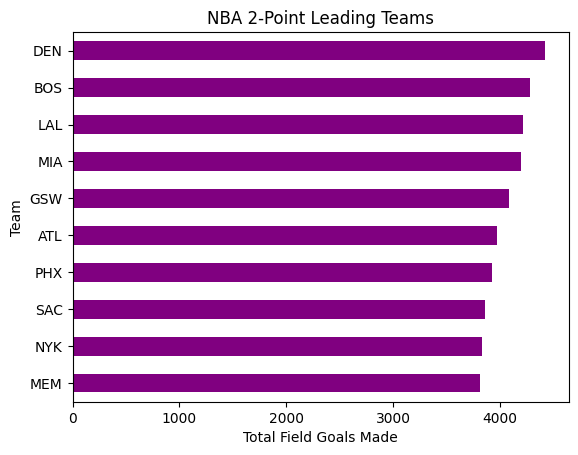

In [23]:
# Ranking by Team Field Goals Made

tm_field_goals = df_basics[['team','FGM','FGA','FGpct']]
teams_by_fgm = tm_field_goals.groupby(['team']).sum(numeric_only = True)
teams_by_fgm.sort_values(['FGM'], ascending=False, inplace=True)
tm_top_10_made2pointers = teams_by_fgm.nlargest(10,'FGM')
tm_top_10_made2pointers.reset_index(inplace=True)
print(tm_top_10_made2pointers)

tm_top_10_made2pointers.plot(x='team',y='FGM', kind='barh', legend=False, color='purple')
plt.xlabel('Total Field Goals Made')
plt.ylabel('Team')
plt.title("NBA 2-Point Leading Teams")
plt.gca().invert_yaxis()
plt.show()


  team   3PM   3PA    3Ppct
0  BOS  1596  4265  297.252
1  GSW  1551  4093  265.401
2  MIA  1295  3690  247.506
3  MIL  1295  3512  289.228
4  DAL  1246  3362  238.171
5  SAC  1213  3338  268.881
6  DEN  1194  3159  288.822
7  PHI  1169  3048  257.470
8  NYK  1142  3290  224.379
9  IND  1112  3030  231.593


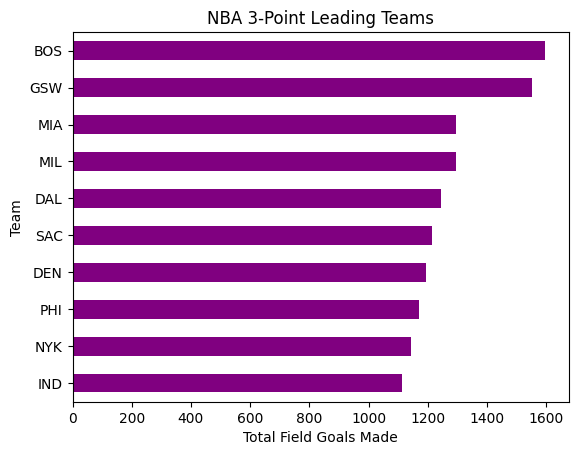

In [24]:
# Ranking by 3 pointers Made per Teams

tm_threes = df_basics[['team','3PM','3PA','3Ppct']]
teams_by_3s = tm_threes.groupby(['team']).sum(numeric_only = True)
teams_by_3s.sort_values(['3PM'], ascending=False, inplace=True)
tm_top_10_3pointers = teams_by_3s.nlargest(10,'3PM')
tm_top_10_3pointers.reset_index(inplace=True)
print(tm_top_10_3pointers)

tm_top_10_3pointers.plot(x='team',y='3PM', kind='barh', legend=False, color='purple')
plt.xlabel('Total Field Goals Made')
plt.ylabel('Team')
plt.title("NBA 3-Point Leading Teams")
plt.gca().invert_yaxis()
plt.show()

  team   FTM   FTA    FTpct
0  LAL  2034  2603  459.724
1  MIA  1981  2392  460.833
2  PHI  1905  2268  403.586
3  NYK  1809  2382  402.118
4  SAC  1761  2235  423.874
5  BOS  1760  2169  392.863
6  DEN  1732  2276  472.059
7  LAC  1642  2094  408.870
8  DET  1623  2106  408.045
9  OKC  1618  1996  370.597


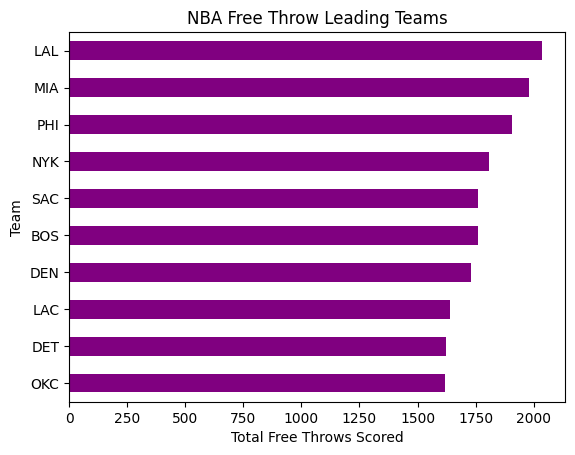

In [25]:
# Ranking by free throw pointers Made per team

tm_free_throws = df_basics[['team','FTM','FTA','FTpct']]
teams_by_free_throws = tm_free_throws.groupby(['team']).sum(numeric_only = True)
teams_by_free_throws.sort_values(['FTM'], ascending=False, inplace=True)
tm_top_10_free_throws = teams_by_free_throws.nlargest(10,'FTM')
tm_top_10_free_throws.reset_index(inplace=True)
print(tm_top_10_free_throws)

tm_top_10_free_throws.plot(x='team',y='FTM', kind='barh', legend=False, color='purple')
plt.xlabel('Total Free Throws Scored')
plt.ylabel('Team')
plt.title("NBA Free Throw Leading Teams")
plt.gca().invert_yaxis()
plt.show()

  team    PTS
0  BOS  11910
1  DEN  11764
2  MIA  11676
3  LAL  11513
4  GSW  11223
5  SAC  10694
6  NYK  10615
7  PHI  10576
8  PHX  10575
9  ATL  10522


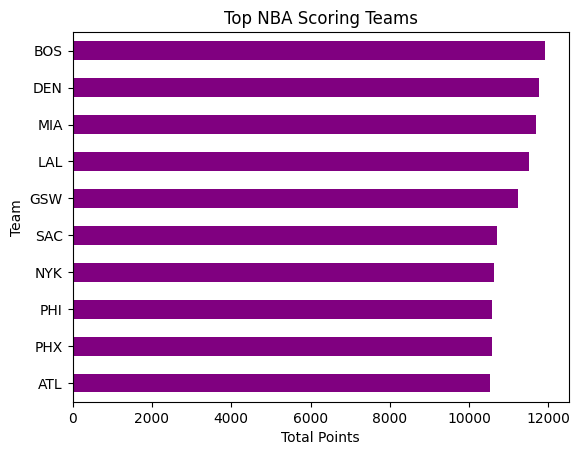

In [26]:
# Ranking by overall points scored per team

tm_points = df_basics[['team','PTS']]
teams_by_points = tm_points.groupby(['team']).sum(numeric_only = True)
teams_by_points.sort_values(['PTS'], ascending=False, inplace=True)
tm_top_10_scorers = teams_by_points.nlargest(10,'PTS')
tm_top_10_scorers.reset_index(inplace=True)
print(tm_top_10_scorers)

tm_top_10_scorers.plot(x='team', y='PTS', kind='barh', legend=False, color='purple')
plt.xlabel('Total Points')
plt.ylabel('Team')
plt.title("Top NBA Scoring Teams")
plt.gca().invert_yaxis()
plt.show()

  team   ORB   DRB   TRB
0  BOS   985  3593  4578
1  LAL   975  3535  4510
2  DEN  1029  3393  4422
3  MIA  1024  3321  4345
4  NYK  1173  3147  4320
5  GSW  1027  3242  4269
6  MIL   965  3245  4210
7  MEM  1067  3035  4102
8  PHX  1072  2996  4068
9  ATL  1015  2950  3965


<Figure size 1000x600 with 0 Axes>

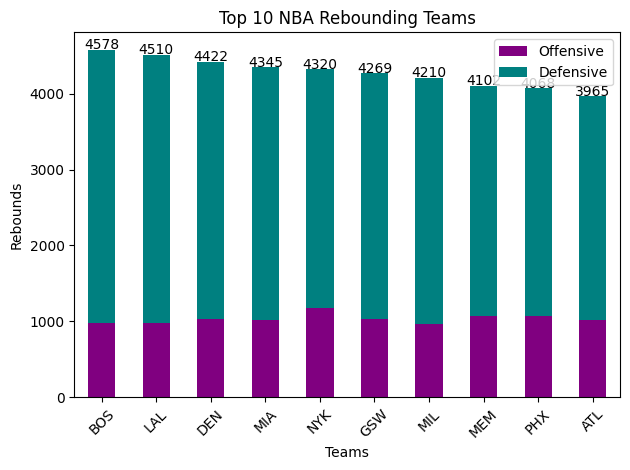

In [27]:
# Ranking by team rebounds Made

tm_rebounders = df_basics[['team','ORB','DRB','TRB']]
team_by_rebounders = tm_rebounders.groupby(['team']).sum(numeric_only = True)
team_by_rebounders.sort_values(['TRB'], ascending=False, inplace=True)
tm_top_10_rebounders = team_by_rebounders.nlargest(10,'TRB')
tm_top_10_rebounders.reset_index(inplace=True)
print(tm_top_10_rebounders)

plt.figure(figsize=(10,6))
ax = tm_top_10_rebounders.plot(x='team', y=['ORB','DRB'], kind='bar', stacked=True, color=['purple','teal'])
ax.set_ylabel('Rebounds')
ax.set_xlabel('Teams')
ax.set_title("Top 10 NBA Rebounding Teams")

for index, row in tm_top_10_rebounders.iterrows():
    total_tm_rebounds = row['TRB']
    ax.text(index, total_tm_rebounds + 5, str(total_tm_rebounds), ha='center', fontsize=10)

plt.xticks(range(len(tm_top_10_rebounders)), tm_top_10_rebounders['team'], rotation=45)
plt.tight_layout()
plt.legend(['Offensive','Defensive','Total'])
plt.show()

  team   AST
0  DEN  2883
1  GSW  2812
2  BOS  2669
3  MIA  2540
4  PHX  2505
5  LAL  2498
6  SAC  2391
7  MIN  2317
8  MEM  2275
9  PHI  2273


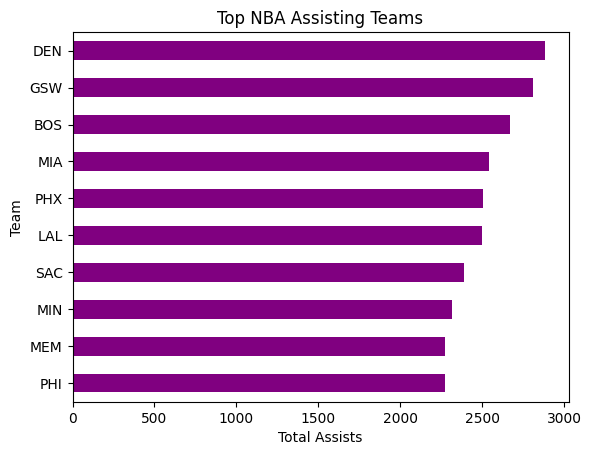

In [28]:
# Ranking by overall points scored per team

tm_assists = df_basics[['team','AST']]
teams_by_assists = tm_assists.groupby(['team']).sum(numeric_only = True)
teams_by_assists.sort_values(['AST'], ascending=False, inplace=True)
tm_top_10_assists = teams_by_assists.nlargest(10,'AST')
tm_top_10_assists.reset_index(inplace=True)
print(tm_top_10_assists)

tm_top_10_assists.plot(x='team', y='AST', kind='barh', legend=False, color='purple')
plt.xlabel('Total Assists')
plt.ylabel('Team')
plt.title("Top NBA Assisting Teams")
plt.gca().invert_yaxis()
plt.show()

Let's take a look at how team records

**Team Win Percentage**

In [29]:
def outcome(matches):

  max_pts = matches.groupby('gameid')['PTS'].transform('max')

  matches['winner'] = matches['PTS'] == max_pts

  return matches


matches = df_basics[['gameid','team','home','PTS']]

team = matches.groupby(['gameid','team']).sum(numeric_only=True).reset_index()

result = outcome(team)

print(team.head(10).to_string(index=False))

  gameid team  home  PTS  winner
22200001  BOS    15  126    True
22200001  PHI     0  117   False
22200002  GSW    13  123    True
22200002  LAL     0  109   False
22200003  DET    14  113    True
22200003  ORL     0  109   False
22200004  IND    15  107   False
22200004  WAS     0  114    True
22200005  ATL    15  117    True
22200005  HOU     0  107   False


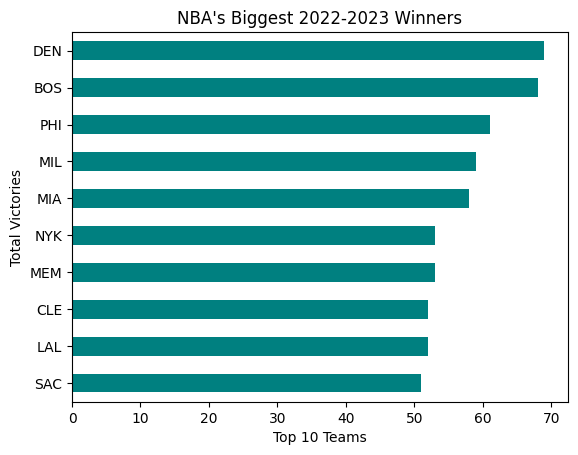

In [30]:
wins = result.groupby('team')['winner'].sum().reset_index()
wins = wins.sort_values('winner', ascending=False)
top_10_teams = wins.nlargest(10,'winner')
top_10_teams.reset_index(inplace=True)


top_10_teams.plot(x='team', y='winner', kind='barh', legend=False, color='teal')
plt.xlabel('Top 10 Teams')
plt.ylabel('Total Victories')
plt.title("NBA's Biggest 2022-2023 Winners")
plt.gca().invert_yaxis()
plt.show()

In [31]:
games_played = result['team'].value_counts().reset_index()
games_played.columns = ['team', 'total_games']

win_stats = pd.merge(wins, games_played, on='team')

win_stats['winning_percentage'] = ((win_stats['winner'] / win_stats['total_games']) * 100).round(1)

top10_team_stats = win_stats.nlargest(10, 'winner')

print(win_stats)

   team  winner  total_games  winning_percentage
0   DEN      69          102                67.6
1   BOS      68          102                66.7
2   PHI      61           93                65.6
3   MIL      59           87                67.8
4   MIA      58          107                54.2
5   NYK      53           93                57.0
6   MEM      53           88                60.2
7   CLE      52           87                59.8
8   LAL      52           99                52.5
9   SAC      51           89                57.3
10  PHX      51           93                54.8
11  GSW      50           95                52.6
12  BKN      45           86                52.3
13  LAC      45           87                51.7
14  MIN      44           89                49.4
15  ATL      44           89                49.4
16  NOP      42           83                50.6
17  OKC      41           84                48.8
18  CHI      41           84                48.8
19  TOR      41     

In [32]:
nba_team_stats = pd.merge(win_stats, teams_by_assists, on='team')
nba_team_stats = pd.merge(nba_team_stats, team_by_rebounders, on='team')
nba_team_stats = pd.merge(nba_team_stats, teams_by_points, on='team')
nba_team_stats = pd.merge(nba_team_stats, teams_by_fgm, on='team')
nba_team_stats = pd.merge(nba_team_stats, teams_by_3s, on='team')
nba_team_stats = pd.merge(nba_team_stats, teams_by_free_throws, on='team')
nba_team_stats = pd.merge(nba_team_stats, teams_by_impact, on='team')

nba_team_stats.rename(columns={'winner': 'wins'}, inplace=True)

print(nba_team_stats.info())
print(nba_team_stats.describe().round(2))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   team                30 non-null     object 
 1   wins                30 non-null     int64  
 2   total_games         30 non-null     int64  
 3   winning_percentage  30 non-null     float64
 4   AST                 30 non-null     int64  
 5   ORB                 30 non-null     int64  
 6   DRB                 30 non-null     int64  
 7   TRB                 30 non-null     int64  
 8   PTS                 30 non-null     int64  
 9   FGM                 30 non-null     int64  
 10  FGA                 30 non-null     int64  
 11  FGpct               30 non-null     float64
 12  3PM                 30 non-null     int64  
 13  3PA                 30 non-null     int64  
 14  3Ppct               30 non-null     float64
 15  FTM                 30 non-null     int64  
 16  FTA       

### PlayOff Season Analysis

In [33]:
#only 16 teams of 30 make it to the playoffs so lets find the top 16 teams
nba_playoffs = nba_team_stats[nba_team_stats['total_games'] > 82]
nba_playoff_teams = nba_playoffs.nlargest(10, 'wins')

print(nba_playoff_teams)

  team  wins  total_games  winning_percentage   AST   ORB   DRB   TRB    PTS  \
0  DEN    69          102                67.6  2883  1029  3393  4422  11764   
1  BOS    68          102                66.7  2669   985  3593  4578  11910   
2  PHI    61           93                65.6  2273   825  3004  3829  10576   
3  MIL    59           87                67.8  2249   965  3245  4210  10183   
4  MIA    58          107                54.2  2540  1024  3321  4345  11676   
5  NYK    53           93                57.0  2086  1173  3147  4320  10615   
6  MEM    53           88                60.2  2275  1067  3035  4102  10215   
7  CLE    52           87                59.8  2155   841  2714  3555   9676   
8  LAL    52           99                52.5  2498   975  3535  4510  11513   
9  SAC    51           89                57.3  2391   880  2935  3815  10694   

    FGM   FGA    FGpct   3PM   3PA    3Ppct   FTM   FTA    FTpct  plusminusPTS  
0  4419  8807  495.662  1194  3159  28

In [34]:
print(nba_playoff_teams.describe().round(2))

        wins  total_games  winning_percentage      AST      ORB      DRB  \
count  10.00        10.00               10.00    10.00    10.00    10.00   
mean   57.60        94.70               60.87  2401.90   976.40  3192.20   
std     6.67         7.29                5.71   246.77   106.79   277.86   
min    51.00        87.00               52.50  2086.00   825.00  2714.00   
25%    52.25        88.25               57.08  2255.00   901.25  3011.75   
50%    55.50        93.00               60.00  2333.00   980.00  3196.00   
75%    60.50       101.25               66.42  2529.50  1027.75  3375.00   
max    69.00       107.00               67.80  2883.00  1173.00  3593.00   

           TRB       PTS      FGM      FGA   FGpct      3PM      3PA   3Ppct  \
count    10.00     10.00    10.00    10.00   10.00    10.00    10.00   10.00   
mean   4168.60  10882.20  3967.30  8302.80  434.21  1201.80  3315.50  258.80   
std     337.54    778.28   282.72   595.04   31.28   170.05   427.18   28.3

### Top Players Vs Playoff Teams Correlation

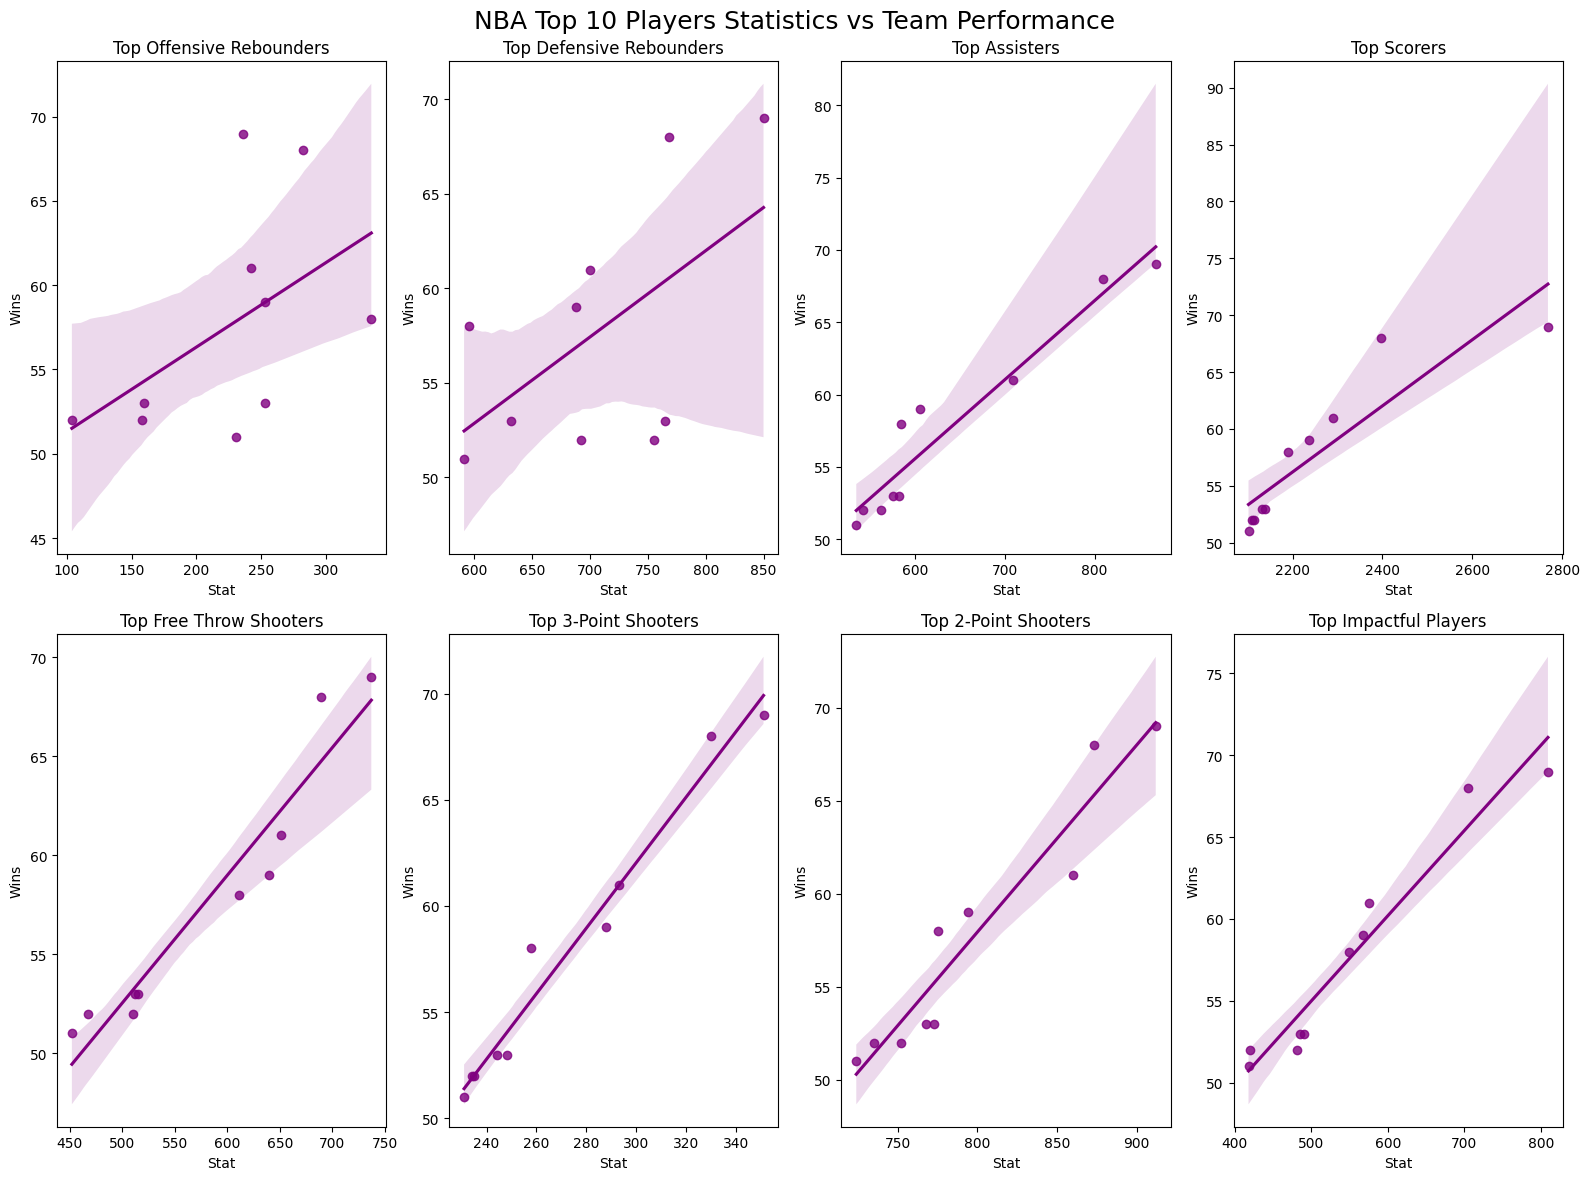

In [35]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['purple'])


fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(16, 12))

axs[0,0].set_title('Top Offensive Rebounders')
sns.regplot(x=nba_top_rebounders_stats['ORB'], y=nba_playoff_teams['wins'], ax=axs[0,0])

axs[0,1].set_title('Top Defensive Rebounders')
sns.regplot(x=nba_top_rebounders_stats['DRB'], y=nba_playoff_teams['wins'], ax=axs[0,1])

axs[0,2].set_title('Top Assisters')
sns.regplot(x=nba_top_assistants_stats['AST'], y=nba_playoff_teams['wins'], ax=axs[0,2])

axs[0,3].set_title('Top Scorers')
sns.regplot(x=nba_top_scorers_stats['PTS'], y=nba_playoff_teams['wins'], ax=axs[0,3])

axs[1,0].set_title('Top Free Throw Shooters')
sns.regplot(x=nba_top_lineshooters_stats['FTM'], y=nba_playoff_teams['wins'], ax=axs[1,0])

axs[1,1].set_title('Top 3-Point Shooters')
sns.regplot(x=nba_top_3shooters_stats['3PM'], y=nba_playoff_teams['wins'], ax=axs[1,1])

axs[1,2].set_title('Top 2-Point Shooters')
sns.regplot(x=nba_top_fgshooters_stats['FGM'], y=nba_playoff_teams['wins'], ax=axs[1,2])

axs[1,3].set_title('Top Impactful Players')
sns.regplot(x=nba_top_impactful_players_stats['plusminusPTS'], y=nba_playoff_teams['wins'], ax=axs[1,3])


for ax in axs.flat:
    ax.set(xlabel='Stat', ylabel='Wins')

fig.suptitle("NBA Top 10 Players Statistics vs Team Performance",
             fontsize=18)

fig.tight_layout()
plt.show()

<font color="teal">*The regplot charts show that team performance heavily depends on shooter specialists. The steeper the slope, the more impactful the shooting skill is to team success. Three-point shooters have the steepest slope, followed by 2-point shooters, then free throw shooters. This suggests 3-point specialists contribute most to wins, with 2-point and free throw specialists being less impactful respectively. Players with more positive plus-minus points also have a steep slope, indicating their defensive value. However, top scorers have the flattest slope. Even though they score many points, it doesn't strongly relate to more wins. In summary, shooting efficiency and defense matter more to team effectiveness than simply scoring a lot of points alone. The regplots indicate shooter specialists and defensive players are most integral to victory.*</font>

### Playoff Team Success With Multiple Categories

In [36]:
# Combine DataFrames using boolean indexing
versatile_impacters = top_10_impacters[top_10_impacters['name'].isin(top_10_made2pointers['name']) |
                                       top_10_impacters['name'].isin(top_10_3pointers['name']) |
                                       top_10_impacters['name'].isin(top_10_free_throws['name']) |
                                       top_10_impacters['name'].isin(top_10_scorers['name']) |
                                       top_10_impacters['name'].isin(top_10_assists['name']) |
                                       top_10_impacters['name'].isin(top_10_rebounders['name'])]

# Print the versatile_impacters DataFrame
print(versatile_impacters)


  playerid                name team  plusminusPTS
0   203999        Nikola Jokic  DEN           809
3  1629008  Michael Porter Jr.  DEN           568
4  1628369        Jayson Tatum  BOS           549
6   201950        Jrue Holiday  MIL           485
7  1627750        Jamal Murray  DEN           481
8  1629636      Darius Garland  CLE           420
9   203954         Joel Embiid  PHI           418


In [37]:
# Combine DataFrames using boolean indexing
versatile_fg_shooters =top_10_made2pointers[top_10_made2pointers['name'].isin(top_10_3pointers['name']) |
                                       top_10_made2pointers['name'].isin(top_10_free_throws['name']) |
                                       top_10_made2pointers['name'].isin(top_10_scorers['name']) |
                                       top_10_made2pointers['name'].isin(top_10_assists['name']) |
                                       top_10_made2pointers['name'].isin(top_10_rebounders['name'])]

# Print the versatile_impacters DataFrame
print(versatile_fg_shooters)

  playerid                   name team  FGM   FGA   FGpct
0  1628369           Jayson Tatum  BOS  912  1963  43.255
1   203999           Nikola Jokic  DEN  873  1436  55.789
2  1627759           Jaylen Brown  BOS  860  1748  42.923
3   203954            Joel Embiid  PHI  794  1481  40.127
4  1628389            Bam Adebayo  MIA  775  1482  52.706
5  1630162        Anthony Edwards  MIN  773  1691  38.948
8   203507  Giannis Antetokounmpo  MIL  735  1331  36.279
9  1628378       Donovan Mitchell  CLE  724  1506  34.611


In [38]:
# Combine DataFrames using boolean indexing
versatile_3p_shooters =top_10_3pointers[top_10_3pointers['name'].isin(top_10_free_throws['name']) |
                                       top_10_3pointers['name'].isin(top_10_scorers['name']) |
                                       top_10_3pointers['name'].isin(top_10_assists['name']) |
                                       top_10_3pointers['name'].isin(top_10_rebounders['name'])]

# Print the versatile_impacters DataFrame
print(versatile_3p_shooters)

  playerid             name team  3PM  3PA   3Ppct
2  1628369     Jayson Tatum  BOS  293  850  31.187
6   203081   Damian Lillard  POR  244  658  20.537
7   203944    Julius Randle  NYK  235  702  25.817
9  1630162  Anthony Edwards  MIN  231  638  30.876


In [39]:
# Combine DataFrames using boolean indexing
versatile_ft_shooters =top_10_free_throws[top_10_free_throws['name'].isin(top_10_scorers['name']) |
                                       top_10_free_throws['name'].isin(top_10_assists['name']) |
                                       top_10_free_throws['name'].isin(top_10_rebounders['name'])]

# Print the versatile_impacters DataFrame
print(versatile_ft_shooters)

  playerid                     name team  FTM  FTA   FTpct
0   203954              Joel Embiid  PHI  737  855  64.467
1  1628983  Shai Gilgeous-Alexander  OKC  689  759  63.384
2  1628369             Jayson Tatum  BOS  651  759  78.870
3   202710             Jimmy Butler  MIA  640  762  71.202
4  1629027               Trae Young  ATL  611  691  68.882
5  1629029              Luka Doncic  DAL  515  694  47.455
9   203999             Nikola Jokic  DEN  452  554  68.450


In [40]:
# Combine DataFrames using boolean indexing
versatile_shooters =top_10_scorers[top_10_scorers['name'].isin(top_10_assists['name']) |
                                       top_10_scorers['name'].isin(top_10_rebounders['name'])]

# Print the versatile_impacters DataFrame
print(versatile_shooters)

  playerid           name team   PTS
0  1628369   Jayson Tatum  BOS  2768
2   203999   Nikola Jokic  DEN  2290
7  1629027     Trae Young  ATL  2114
9   203944  Julius Randle  NYK  2102


In [41]:
# Combine DataFrames using boolean indexing
versatile_assists = top_10_assists[top_10_assists['name'].isin(top_10_rebounders['name'])]

# Print the versatile_impacters DataFrame
print(versatile_assists)

  playerid              name team  AST
0   203999      Nikola Jokic  DEN  868
3  1627734  Domantas Sabonis  SAC  606


In [42]:

# List of dataframes to check
players_to_check = [
    versatile_impacters,
    versatile_fg_shooters,
    versatile_3p_shooters,
    versatile_ft_shooters,
    versatile_shooters,
    versatile_assists
]

#tracking name occurrences with dictionary
player_occurrences = {}

# Count the occurrences of each name across dataframes
for players in players_to_check:
    names = players['name'].tolist()
    for name in set(names):  #This should help avoid double-counting
        player_occurrences[name] = player_occurrences.get(name, 0) + 1

# Find players that appear in at least 2 dataframes
selected_names = [name for name, count in player_occurrences.items() if count >= 2]

# Create a new dataframe with unique selected names
versatile_players = pd.DataFrame({'name': selected_names})

# Print the versatile players
print(versatile_players)


              name
0     Jayson Tatum
1      Joel Embiid
2     Nikola Jokic
3  Anthony Edwards
4    Julius Randle
5       Trae Young


In [43]:
versatile_player_stats = pd.merge(versatile_players, player_stats, on='name', how='left')
versatile_player_stats.groupby('name')

print(versatile_player_stats)

              name  home       SEC  FGM   FGA   FGpct  3PM  3PA   3Ppct  FTM  \
0     Jayson Tatum    47  211874.0  912  1963  43.255  293  850  31.187  651   
1      Joel Embiid    42  157231.0  794  1481  40.127   71  228  19.909  737   
2     Nikola Jokic    46  186711.0  873  1436  55.789   92  225  28.561  452   
3  Anthony Edwards    44  187310.0  773  1691  38.948  231  638  30.876  355   
4    Julius Randle    44  184013.0  713  1579  38.661  235  702  25.817  441   
5       Trae Young    42  168442.0  665  1557  34.079  173  522  25.755  611   

   ...  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  plusminusPTS  
0  ...  104  755   859  447   99   72  269  204  2768           549  
1  ...  129  629   758  298   72  137  261  232  2396           418  
2  ...  236  850  1086  868  108   67  317  243  2290           809  
3  ...   52  449   501  387  137   72  273  204  2132            85  
4  ...  158  692   850  352   54   24  251  257  2102           185  
5  ...   62  185   

In [44]:
# List of dataframes to check
teams_to_check = [
    versatile_impacters,
    versatile_fg_shooters,
    versatile_3p_shooters,
    versatile_ft_shooters,
    versatile_shooters,
    versatile_assists
]

#tracking name occurrences with dictionary
team_occurrences = {}

# Count the occurrences of each name across dataframes
for nba_teams in teams_to_check:
    nba_teams = nba_teams['team'].tolist()
    for nba_teams in set(nba_teams):  #This should help avoid double-counting
        team_occurrences[nba_teams] = team_occurrences.get(nba_teams, 0) + 1

# Find players that appear in at least 2 dataframes
selected_teams = [nba_teams for nba_teams, count in team_occurrences.items() if count >= 2]

# Create a new dataframe with unique selected names
versatile_teams = pd.DataFrame({'team': selected_teams})

# Print the versatile players
print(versatile_teams)

  team
0  PHI
1  MIL
2  CLE
3  BOS
4  DEN
5  MIN
6  MIA
7  NYK
8  ATL


In [45]:
#playoff teams with versitile players
percent_of_playoff_teams = (versatile_teams['team'].count().sum()/nba_playoff_teams['team'].count().sum())*100
print(f"Percentage of playoff teams with versatile players: {percent_of_playoff_teams:.1f}%")

Percentage of playoff teams with versatile players: 90.0%
